In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as p
from pylab import *
from scipy.stats import skew

%matplotlib inline

### Ucitavanje baze u dataframe

In [7]:
df = pd.read_csv('BeijingPM20100101_20151231.csv')

In [8]:
df.head(10)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,NaN,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,NaN,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0


### Upoznavanje sa bazom

In [9]:
print('Broj uzoraka u bazi: ', df.shape[0])

Broj uzoraka u bazi:  52584


In [10]:
print('Broj obelezja u bazi: ', df.shape[1])

Broj obelezja u bazi:  18


In [11]:
df.info() # Informacije o tipu podataka obelezja i njihovom ukupnom broju

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null  float64
 17  Iprec       

In [12]:
df.nunique() # Broj jedinstvenih vrednosti obelezja

No                 52584
year                   6
month                 12
day                   31
hour                  24
season                 4
PM_Dongsi            524
PM_Dongsihuan        536
PM_Nongzhanguan      523
PM_US Post           607
DEWP                  69
HUMI                 102
PRES                  60
TEMP                  64
cbwd                   4
Iws                 2975
precipitation        143
Iprec                369
dtype: int64

In [13]:
df.drop(columns='No', inplace=True) # Izbacivanje potpuno nepotrebnog obelezja koji samo prebrojava redove

#### Kategoricka obelezja i broj njihovih jedinstvenih vrednosti

In [14]:
df.nunique()[df.nunique().values <=31]

year       6
month     12
day       31
hour      24
season     4
cbwd       4
dtype: int64

#### Numericka obelezja i broj njihovih jedinstvenih vrednosti

In [15]:
df.nunique()[df.nunique().values >31]

PM_Dongsi           524
PM_Dongsihuan       536
PM_Nongzhanguan     523
PM_US Post          607
DEWP                 69
HUMI                102
PRES                 60
TEMP                 64
Iws                2975
precipitation       143
Iprec               369
dtype: int64

#### Nedostajuci podaci

In [16]:
df.isnull().sum() # Broj nedostajucih podataka po obelezjima

year                   0
month                  0
day                    0
hour                   0
season                 0
PM_Dongsi          27532
PM_Dongsihuan      32076
PM_Nongzhanguan    27653
PM_US Post          2197
DEWP                   5
HUMI                 339
PRES                 339
TEMP                   5
cbwd                   5
Iws                    5
precipitation        484
Iprec                484
dtype: int64

In [17]:
print('Ukupno nedostajucih podataka u bazi ima: ', df.isnull().sum().sum())

Ukupno nedostajucih podataka u bazi ima:  91124


#### Izbacivanje lokacija merenja PM cestica osim 'PM_US Post'

In [18]:
df = df.drop(columns=['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan'])

#### Izbacivanje uzoraka u kojima postoje nedostajuci podaci

In [19]:
df = df.dropna().reset_index(drop=True)
df

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,23,4,129.0,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0
1,2010,1,2,0,4,148.0,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0
2,2010,1,2,1,4,159.0,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0
3,2010,1,2,2,4,181.0,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0
4,2010,1,2,3,4,138.0,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49574,2015,12,31,19,4,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
49575,2015,12,31,20,4,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
49576,2015,12,31,21,4,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
49577,2015,12,31,22,4,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [20]:
df.describe(include='all') # Statisticki opis obelezja

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
count,49579.000000,49579.000000,49579.000000,49579.000000,49579.000000,49579.000000,49579.000000,49579.000000,49579.000000,49579.000000,49579,49579.000000,49579.000000,49579.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17223,NaN,NaN,NaN
mean,2012.509873,6.474092,15.679522,11.500454,2.491539,95.831703,1.994554,54.510982,1016.456947,12.581274,NaN,23.334171,0.066544,0.334093
std,1.688580,3.445692,8.809034,6.924448,1.121948,91.801976,14.287751,25.982313,10.327627,12.118085,NaN,49.090667,0.875140,3.980143
min,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,NaN,0.450000,0.000000,0.000000
25%,2011.000000,3.000000,8.000000,5.000000,1.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,NaN,1.790000,0.000000,0.000000
50%,2013.000000,6.000000,16.000000,12.000000,2.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,NaN,5.340000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,18.000000,4.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,NaN,21.460000,0.000000,0.000000


In [98]:
numeric_cols = df.nunique()[df.nunique().values >31].index.tolist()
corr = df[numeric_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
PM_US Post,1.000000,0.133233,0.419491,-0.019871,-0.123285,-0.240018,-0.027093,-0.043672
DEWP,0.133233,1.000000,0.612170,-0.772658,0.821416,-0.286537,0.083202,0.086627
HUMI,0.419491,0.612170,1.000000,-0.234500,0.077836,-0.306823,0.097002,0.120889
PRES,-0.019871,-0.772658,-0.234500,1.000000,-0.825144,0.168600,-0.064131,-0.072790
TEMP,-0.123285,0.821416,0.077836,-0.825144,1.000000,-0.140524,0.045718,0.038141
Iws,-0.240018,-0.286537,-0.306823,0.168600,-0.140524,1.000000,-0.013590,-0.003890
precipitation,-0.027093,0.083202,0.097002,-0.064131,0.045718,-0.013590,1.000000,0.490477
Iprec,-0.043672,0.086627,0.120889,-0.072790,0.038141,-0.003890,0.490477,1.000000


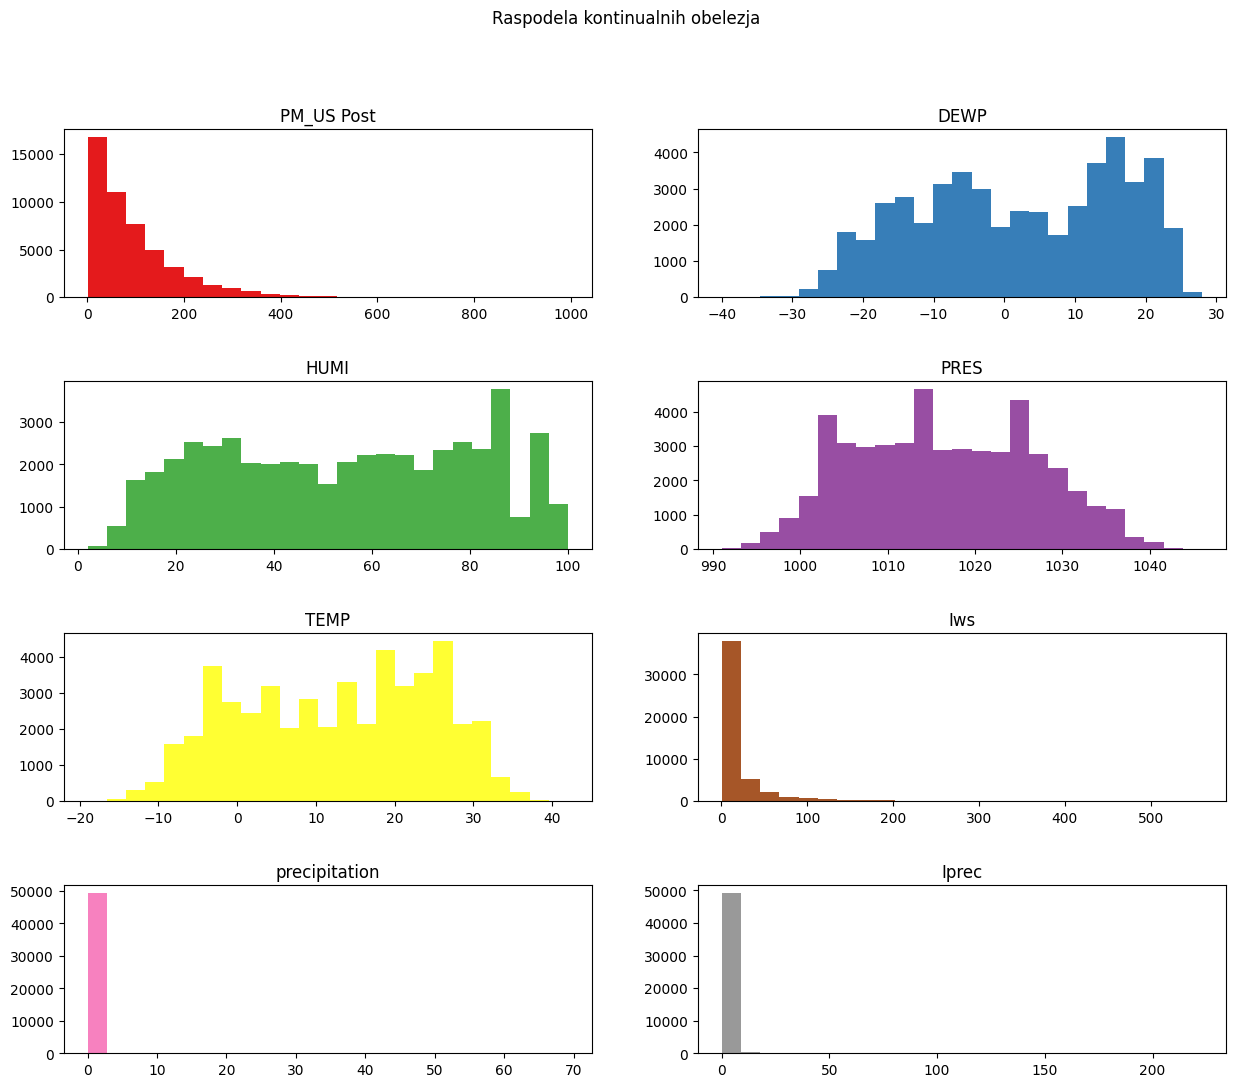

In [132]:
cmap = cm.get_cmap('Set1', 8)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

fig, axs = plt.subplots(nrows=int(len(numeric_cols)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Raspodela kontinualnih obelezja')

cnt=0
for col, ax in zip(numeric_cols, axs.ravel()):
    df[col].hist(ax=ax, bins=25, grid=False, color=color_list[cnt])
    cnt+=1
    ax.set_title(col)
    ax.set_xlabel("")

plt.show()


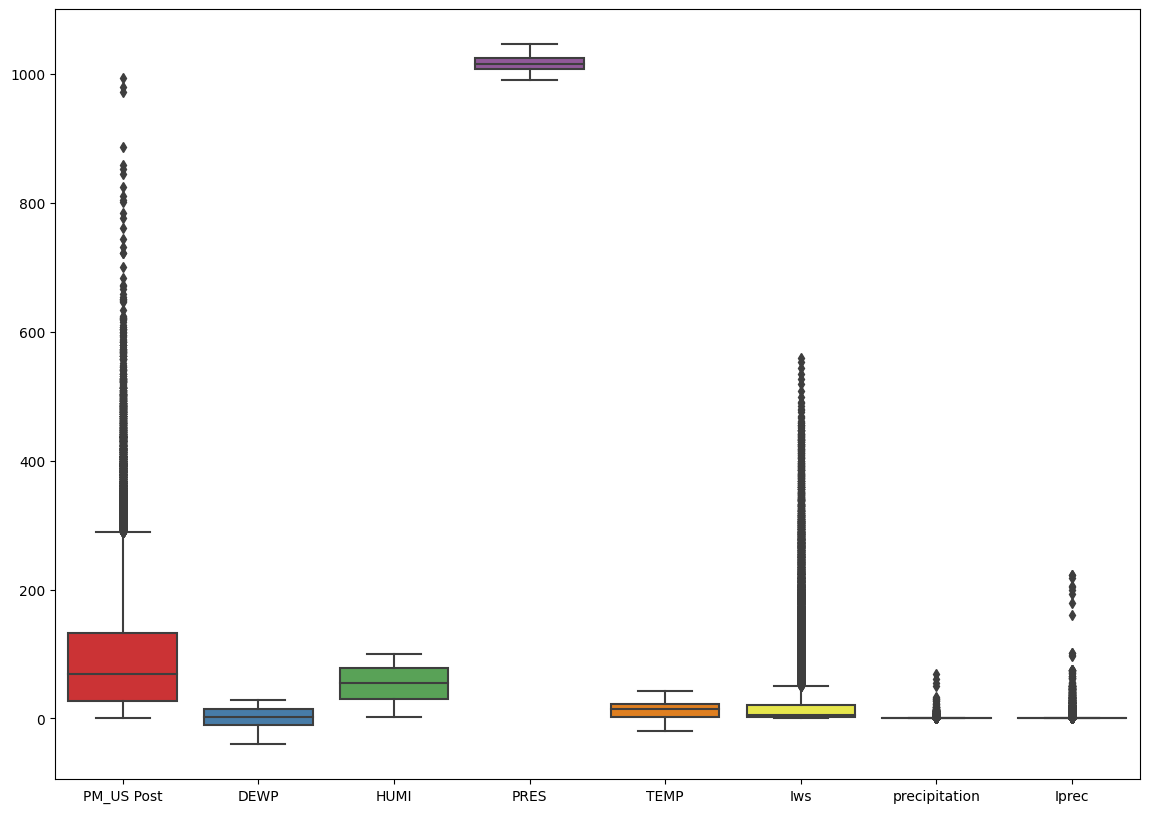

In [133]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df[numeric_cols], palette=sns.color_palette("Set1"));

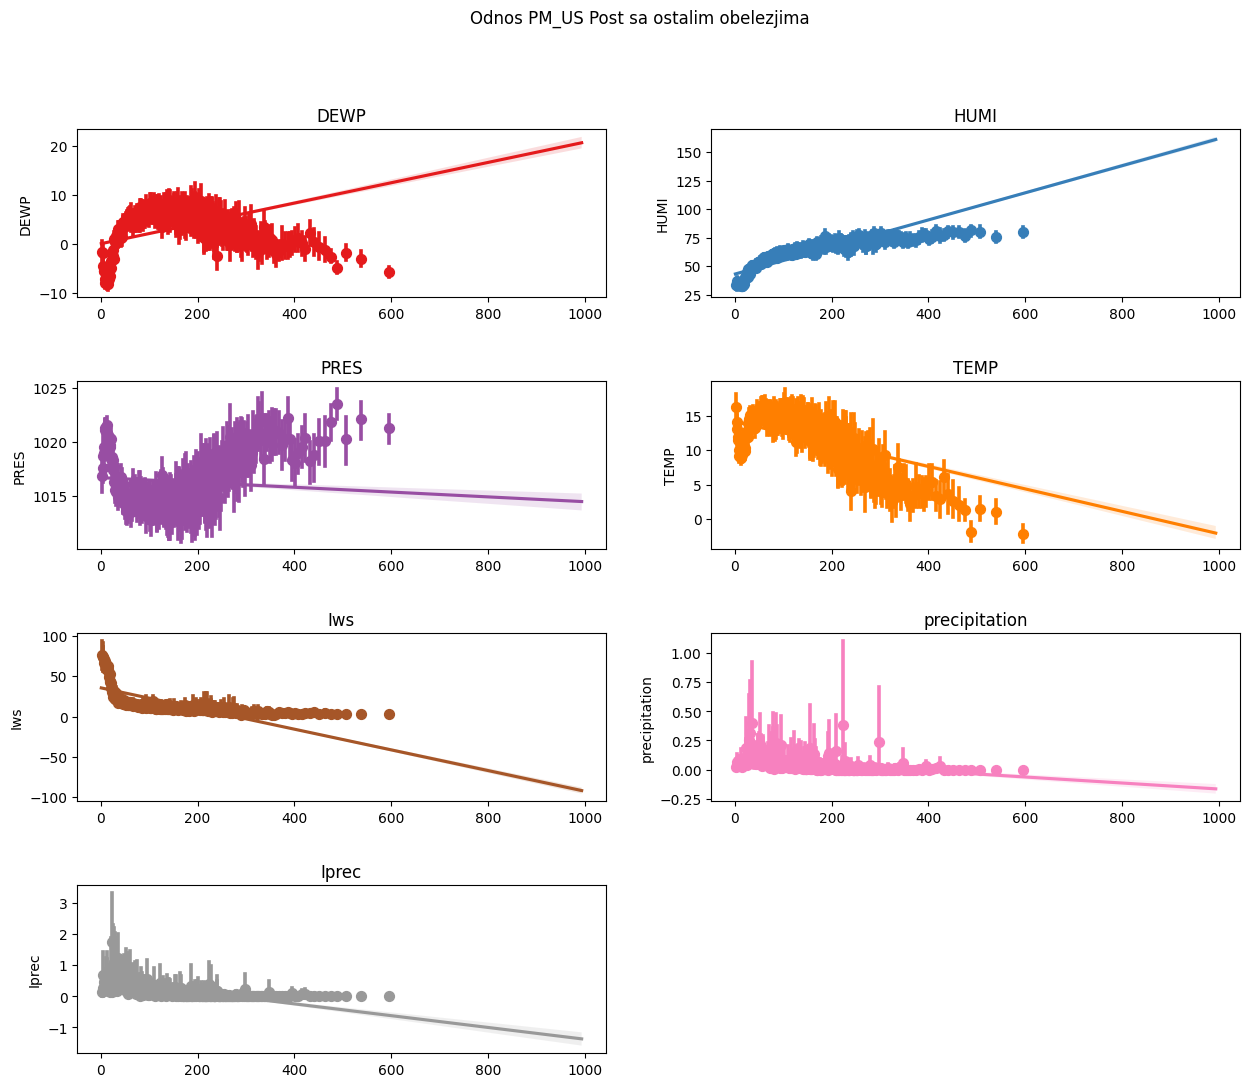

In [130]:
cmap = cm.get_cmap('Set1', 7)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

num_cols_minus_one = pd.Series(numeric_cols).drop(index=pd.Series(numeric_cols)[pd.Series(numeric_cols)=='PM_US Post'].index[0]).values.tolist()
fig, axs = plt.subplots(nrows=int(len(numeric_cols)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Odnos PM_US Post sa ostalim obelezjima')

cnt=0
for col, ax in zip(num_cols_minus_one, axs.ravel()):
    
    sns.regplot(x='PM_US Post', y=col, data=df[numeric_cols], ax=ax, scatter=True, x_bins=1000, color=color_list[cnt])
    cnt+=1
    ax.set_title(col)
    ax.set_xlabel("")

fig.delaxes(axs[3,1])

plt.show()


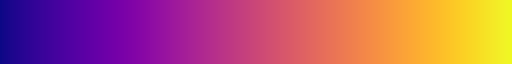

In [125]:
plt.get_cmap('plasma')


In [123]:
color_list

['#0d0887', '#5c01a6', '#9c179e', '#cc4778', '#ed7953', '#fdb42f', '#f0f921']

In [86]:
numeric_cols

['HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation', 'Iprec']

In [78]:
num_cols_minus_one

(array([3.2109e+04, 1.1447e+04, 3.9440e+03, 1.4130e+03, 4.9000e+02,
        1.2700e+02, 3.0000e+01, 8.0000e+00, 8.0000e+00, 3.0000e+00]),
 array([  1. , 100.3, 199.6, 298.9, 398.2, 497.5, 596.8, 696.1, 795.4,
        894.7, 994. ]),
 <BarContainer object of 10 artists>)

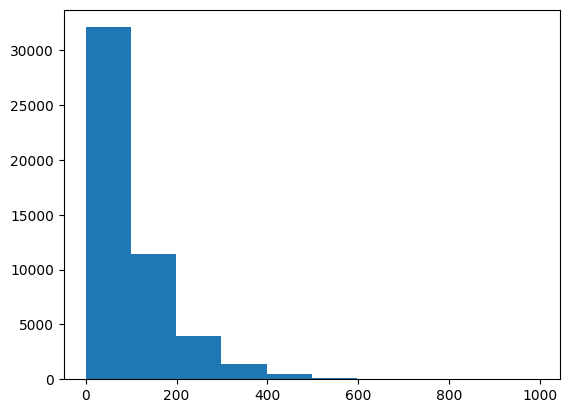

In [27]:
plt.figure()
plt.hist(df['PM_US Post'])

In [ ]:
fig, axs = plt.subplots(len(df.nunique()[df.nunique().values >31]), 1)
cols = df.columns.tolist()

for i in len(cols):
    axs[i].hist(df.columns.tolist()[])

In [24]:
df.columns

Index(['year', 'month', 'day', 'hour', 'season', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

In [ ]:
x = np.linspace(-10, 10, 50000)
y = df['PM_US Post'].values
p.plot(x, y, '*')

print(df['PM_US Post'].skew())

In [ ]:
plt.boxplot(df['PM_US Post'])
plt.show()

In [ ]:
sns.boxplot(data=df, x='DEWP')

In [ ]:
df[df.nunique()[df.nunique().values >31].index.tolist()].boxplot()(column=['PM_*'])
plt.show()

In [89]:
df

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0
